{'z': 0.09760743600565737, 't0': 58265.302296566486, 'x0': 5.980877049674166e-10, 'x1': -0.6349092991672797, 'c': 0.19290912083348302, 'mwebv': 0.17382601125962704, 'mwr_v': -30.266511634594213}


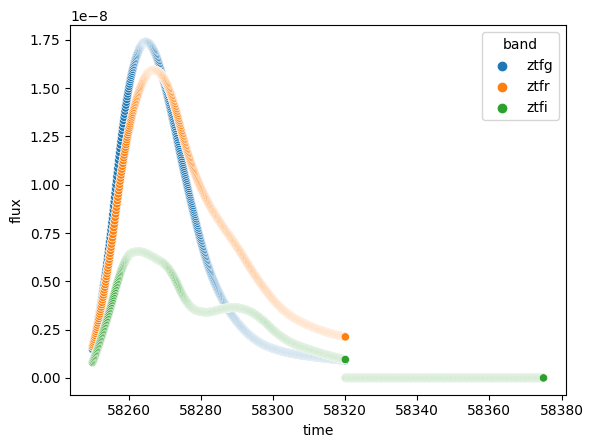

In [1]:
import requests
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
with open('new_project/flux_jansky_dif.json', 'r') as outfile:
    lc = json.load(outfile)
    #data = Target(light_curve=lc, ebv=0.03, name_model='salt2', t_min=58250, t_max=58375, 
                   #count=1000, redshift=[0.01, 0.3])
    data = {'light_curve':lc, 'ebv':0.03, 'name_model':'salt2', 't_min':58250, 't_max':58375, 
                   'count':1000, 'redshift':[0.01, 0.3]}
    #print(json.dumps(data.model_dump_json()))
    BASE_URL = 'http://127.0.0.1:8000/api/v1/sncosmo'
    buf = requests.post(f"{BASE_URL}", json = data).json()#.model_dump_json())
      #"time": 0,
      #"flux": 1,
      #"band": "string"
    #}).json()
    print(buf['parameters'])
    df = pd.DataFrame.from_dict(buf['flux_jansky'], orient='columns')
    sns.scatterplot(data=df, x='time', y='flux', hue='band')
    plt.show()